<a href="https://colab.research.google.com/github/Prateeklk/DataScience_Projects/blob/main/Fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the train dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake_new_NLP/kaggle_fake_train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.drop('id',axis = 1,inplace = True)

In [6]:
df.shape

(20800, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB


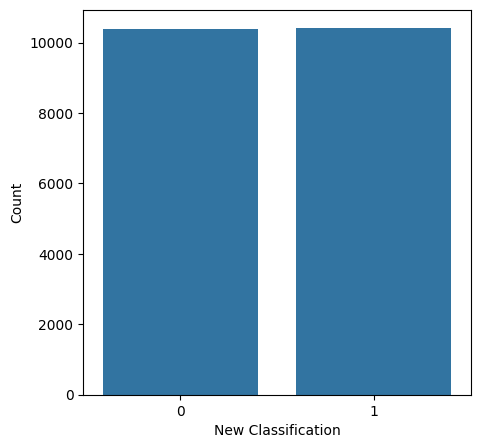

In [8]:
%matplotlib inline
plt.figure(figsize=(5,5))
sns.countplot(x = 'label',data = df)
plt.xlabel("New Classification")
plt.ylabel("Count")
plt.show()

In [9]:
count_1 = 0
count_0 = 0
for i in range(0,len(df)):
  if df['label'][i] == 0:
    count_0+=1
  else:
    count_1+=1
print("fake news : ",count_1)
print("non fake new : ",count_0)

fake news :  10413
non fake new :  10387


In [10]:
counts = df['label'].value_counts()
print(counts)

label
1    10413
0    10387
Name: count, dtype: int64


In [11]:
import pandas as pd
import plotly.express as px

fig = px.histogram(df, x='label', color='label', title='News Classification Count',
                   labels={'label':'News Classification'},
                   category_orders={'label': [0, 1]},
                   color_discrete_map={0: 'lightgrey', 1: 'aliceblue'})
fig.update_layout(
    xaxis_title="News Classification",
    yaxis_title="Count",
    bargap=0.2,
    template='plotly_dark'
)

fig.show()


Data Cleaning

In [12]:
df.isna().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [13]:
df.dropna(inplace = True)

In [14]:
df.isna().any()

title     False
author    False
text      False
label     False
dtype: bool

In [15]:
df.shape

(18285, 4)

In [16]:
news = df.copy()
news.reset_index(inplace = True)

Clearning the text


In [17]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
news.shape[0]

18285

In [19]:
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):

  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])
  title = title.lower()
  words = title.split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  title = ' '.join(words)
  corpus.append(title)

In [20]:
corpus[0:5]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri']

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=4000, ngram_range = (1,3))
x = cv.fit_transform(corpus).toarray()

In [22]:
x.shape

(18285, 4000)

In [23]:
y = news['label']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


In [25]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [26]:
print(nb_classifier.get_params())


{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}


In [27]:
nb_y_pred = nb_classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 90.02%
Precision score is: 0.87
Recall score is: 0.91


In [29]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)

[[1816  224]
 [ 141 1476]]


In [31]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.5,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test,temp_y_pred)
  print(f"Accuracy score for alpha={round(i, 1)} is: {round(score * 100, 2)}%")


Accuracy score for alpha=0.1 is: 90.16%
Accuracy score for alpha=0.2 is: 90.07%
Accuracy score for alpha=0.3 is: 90.05%
Accuracy score for alpha=0.4 is: 90.07%
Accuracy score for alpha=0.5 is: 90.13%
Accuracy score for alpha=0.6 is: 90.05%
Accuracy score for alpha=0.7 is: 90.1%
Accuracy score for alpha=0.8 is: 90.13%
Accuracy score for alpha=0.9 is: 90.07%
Accuracy score for alpha=1.0 is: 90.02%
Accuracy score for alpha=1.1 is: 90.02%
Accuracy score for alpha=1.2 is: 90.07%
Accuracy score for alpha=1.3 is: 90.1%
Accuracy score for alpha=1.4 is: 90.1%


Logestic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [34]:
print(lr_classifier.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [35]:
lr_y_pred = lr_classifier.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 93.49%
Precision score is: 0.89
Recall score is: 0.97


In [38]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test,lr_y_pred)
lr_cm

array([[1852,  188],
       [  50, 1567]])

In [41]:
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = LogisticRegression(C=i, random_state=0)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))

Accuracy score for C=0.1 is: 92.1%
Accuracy score for C=0.2 is: 92.86%
Accuracy score for C=0.3 is: 93.14%
Accuracy score for C=0.4 is: 93.33%
Accuracy score for C=0.5 is: 93.46%
Accuracy score for C=0.6 is: 93.52%
Accuracy score for C=0.7 is: 93.57%
Accuracy score for C=0.8 is: 93.63%
Accuracy score for C=0.9 is: 93.49%
Accuracy score for C=1.0 is: 93.49%


In [65]:
classifier = LogisticRegression(C = 0.2)
classifier.fit(X_train,y_train)

LogisticRegression(C=0.2)

In [66]:
def fake_news(sample_news):
  sample_news = re.sub(r'[^a-zA-Z]',' ',sample_news)
  sample_news = sample_news.lower()
  sample_news = sample_news.split()
  sample_news = [word for word in sample_news if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news]
  final_news = " ".join(final_news)
  temp = cv.transform([final_news]).toarray()
  return classifier.predict(temp)



In [67]:

df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake_new_NLP/kaggle_fake_test.csv')

In [68]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [69]:
df_test.isna().any()

id        False
title      True
author     True
text       True
dtype: bool

In [70]:
df_test.shape

(5200, 4)

In [71]:
new_title = df_test['title']

In [72]:
copy_title = new_title.copy()

In [73]:
temp = copy_title.dropna()
temp.shape

(5078,)

In [74]:
from random import randint

In [75]:
row = randint(0,temp.shape[0] - 1)
sample_news = temp[row]

In [77]:
print(f' NEWS : {sample_news}')
if fake_news(sample_news):
  print("Prediction : FAKE NEWS!!")
else:
  print("Prediction : REAL NEWS!!")


 NEWS : Watch: Peter Schweizer Details How John Podesta May Have Violated Federal Law - Breitbart
Prediction : REAL NEWS!!


In [83]:
for i in range(10):
  row = randint(0,temp.shape[0] - 1)
  sample_news = temp.iloc[row]
  print(f' NEWS : {sample_news}')
  if fake_news(sample_news):
    print("Prediction : FAKE NEWS!!")
  else:
    print("Prediction : REAL NEWS!!")


 NEWS : Donald Trump Vows Court Battle for ’Common Sense’ Immigration Executive Order
Prediction : REAL NEWS!!
 NEWS : US-led coalition killed 300 Syrian civilians in 11 probed strikes – Amnesty
Prediction : FAKE NEWS!!
 NEWS : Subway Riders Scrub Anti-Semitic Graffiti, as ‘Decent Human Beings’ - The New York Times
Prediction : REAL NEWS!!
 NEWS : Measles Outbreak in Minnesota Within Somali Community Spreads Through State
Prediction : FAKE NEWS!!
 NEWS : Johnson & Johnson Lose Third Multimillion Dollar Case Over Baby Talc
Prediction : FAKE NEWS!!
 NEWS : How to Organically Take Care of Your Backyard Apple Tree
Prediction : FAKE NEWS!!
 NEWS : The De Facto US/Al Qaeda Alliance
Prediction : FAKE NEWS!!
 NEWS : Trump: McCain ‘Losing So Long He Doesn’t Know How to Win’
Prediction : FAKE NEWS!!
 NEWS : Most Devastating Man-Made Disasters in Human History [CARTOON]
Prediction : FAKE NEWS!!
 NEWS : State Dept. Dissent Cable on Trump’s Ban Draws 1,000 Signatures - The New York Times
Prediction